<table style="background-color:#F5F5F5;" width="100%">
<tr><td style="background-color:#F5F5F5;"><img src="../images/logo.png" width="150" align='right'/></td></tr>     <tr><td>
            <h2><center>Aprendizagem Automática em Engenharia Biomédica</center></h2>
            <h3><center>1st Semester - 2022/2023</center></h3>
            <h4><center>Universidade Nova de Lisboa - Faculdade de Ciências e Tecnologia</center></h4>
</td></tr>
    <tr><td><h2><b><center>Lab 2 - Data Preparation</center></b></h2>
    <h4><i><b><center>Loading, Visualizing, Describing, Split and Encoding</center></b></i></h4></td></tr>
</table>

## 1. Loading, Visualizing and Describing

The first step of any Machine Learning project is loading the data we are going to work with.
There are several ways to do this process, but one of the most relevant for Data Science is the Pandas library.


##### **Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Who's surviving Titanic?

### 1.1 Loading tools

Pandas provides multiple ways of loading data files, specialized in different formats:
* read_csv()
* read_excel()
* read_pickle()
* read_json()
* read_html()


In [ ]:
df_titanic = pd.read_csv("Data/titanic.csv")

### 1.2. Getting to know the Data

Pandas DataFrame objects include a set of useful attributes, which we can use to properly understand the data.

In [ ]:
# Get the columns of the dataset
df_titanic.columns

In [ ]:
# Define the PassangerId as the index column
df_titanic.set_index('PassengerId', inplace=True)

In [ ]:
# Get the index information
df_titanic.index

In [ ]:
# Check the top samples
df_titanic.head()

In [ ]:
# Dataframe size
print('DataFrame size: ', len(df_titanic))

In [ ]:
# Number of unique values
print('Number of unique values on Pclass:', df_titanic['Pclass'].nunique())

In [ ]:
# Dataset Data Types
df_titanic.dtypes

In [ ]:
# Dataset Information
df_titanic.info()

In [ ]:
# Dataset Statistics
df_titanic.describe()

In [ ]:
# Check for Missing Data
for column in df_titanic.columns:
    print(column + ' - ' + str(df_titanic[column].isnull().sum()))

### 1.3. Visualization

The Pandas library also includes some visualization tools, to get a more interpretable way of understanding data.

In [ ]:
# Check the data distribution
df_titanic['Pclass'].value_counts()

In [ ]:
plt = df_titanic['Pclass'].value_counts().sort_index().plot(kind='bar', title='')
plt.set_title('Class Count')
plt.set_xlabel('Pclass')
plt.set_ylabel('No. Passangers')

### 1.4. Grouping Variables

The Pandas's [GroupBy()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) allows to group several columns of the dataset and apply further processing.

*Which ticket class had the most probability of surviving?*

In [ ]:
plt = df_titanic[['Pclass', 'Survived']].groupby('Pclass').mean().Survived.plot(kind='barh')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

*And can you guess which Sex had more chances?*

In [ ]:
plt = df_titanic[['Sex', 'Survived']].groupby('Sex').mean().Survived.plot(kind='bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Survival Probability')

### 1.5. Feature Engineering

Models often benefit from new infered features, created from the original data. As the variable SibSp encodes the number of siblings and spouses, and the variable Parch encodes the number of parents and children, we can infer the size of the family.

In [ ]:
df_titanic['Family'] = df_titanic["SibSp"] + df_titanic["Parch"]

### 1.6. Pandas Profiling

[Pandas Profiling](https://pandas-profiling.ydata.ai/docs/master/index.html) is a python library which generates insightful reports on Pandas datasets.

Note: You (may) need to install it!

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df_titanic, title="Titanic Profiling", vars={"num": {"low_categorical_threshold": 0}})

In [ ]:
profile

In [ ]:
profile.to_file("titanic_dataset.html")

### 1.7. Exercices

__Exercice 1__: Load [Breast Cancer dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data) from UCI Repository. Alternatively, you can use the link as the first input of `pd.read_csv()` function

__Exercice 2__: Set the columns names with the following attributes names

__Exercice 3__: Check if there are duplicate values

__Exercice 4__: Drop duplicates using the attribute `inplace=True`

__Exercice 5__: Check if Sample ID is unique

__Exercice 6__: Which Sample ID have different attributes values?

__Exercice 7__: Drop Sample IDs with inconsistent values

__Exercice 8__: Set Sample ID as dataframe index

__Exercice 9__: Check column types using `df.info()`. Why `Bare Nuclei` is object? Hint: Try to convert it to int

__Exercice 10__: Remove Sample IDs with missing values and convert Bare Nuclei to int

## 2. Train and Test Split

To train Machine Learning models, we need to ensure methods are robust to be deployed. One of the gold standard processes is to divide datasets into train and test sets.

<div>
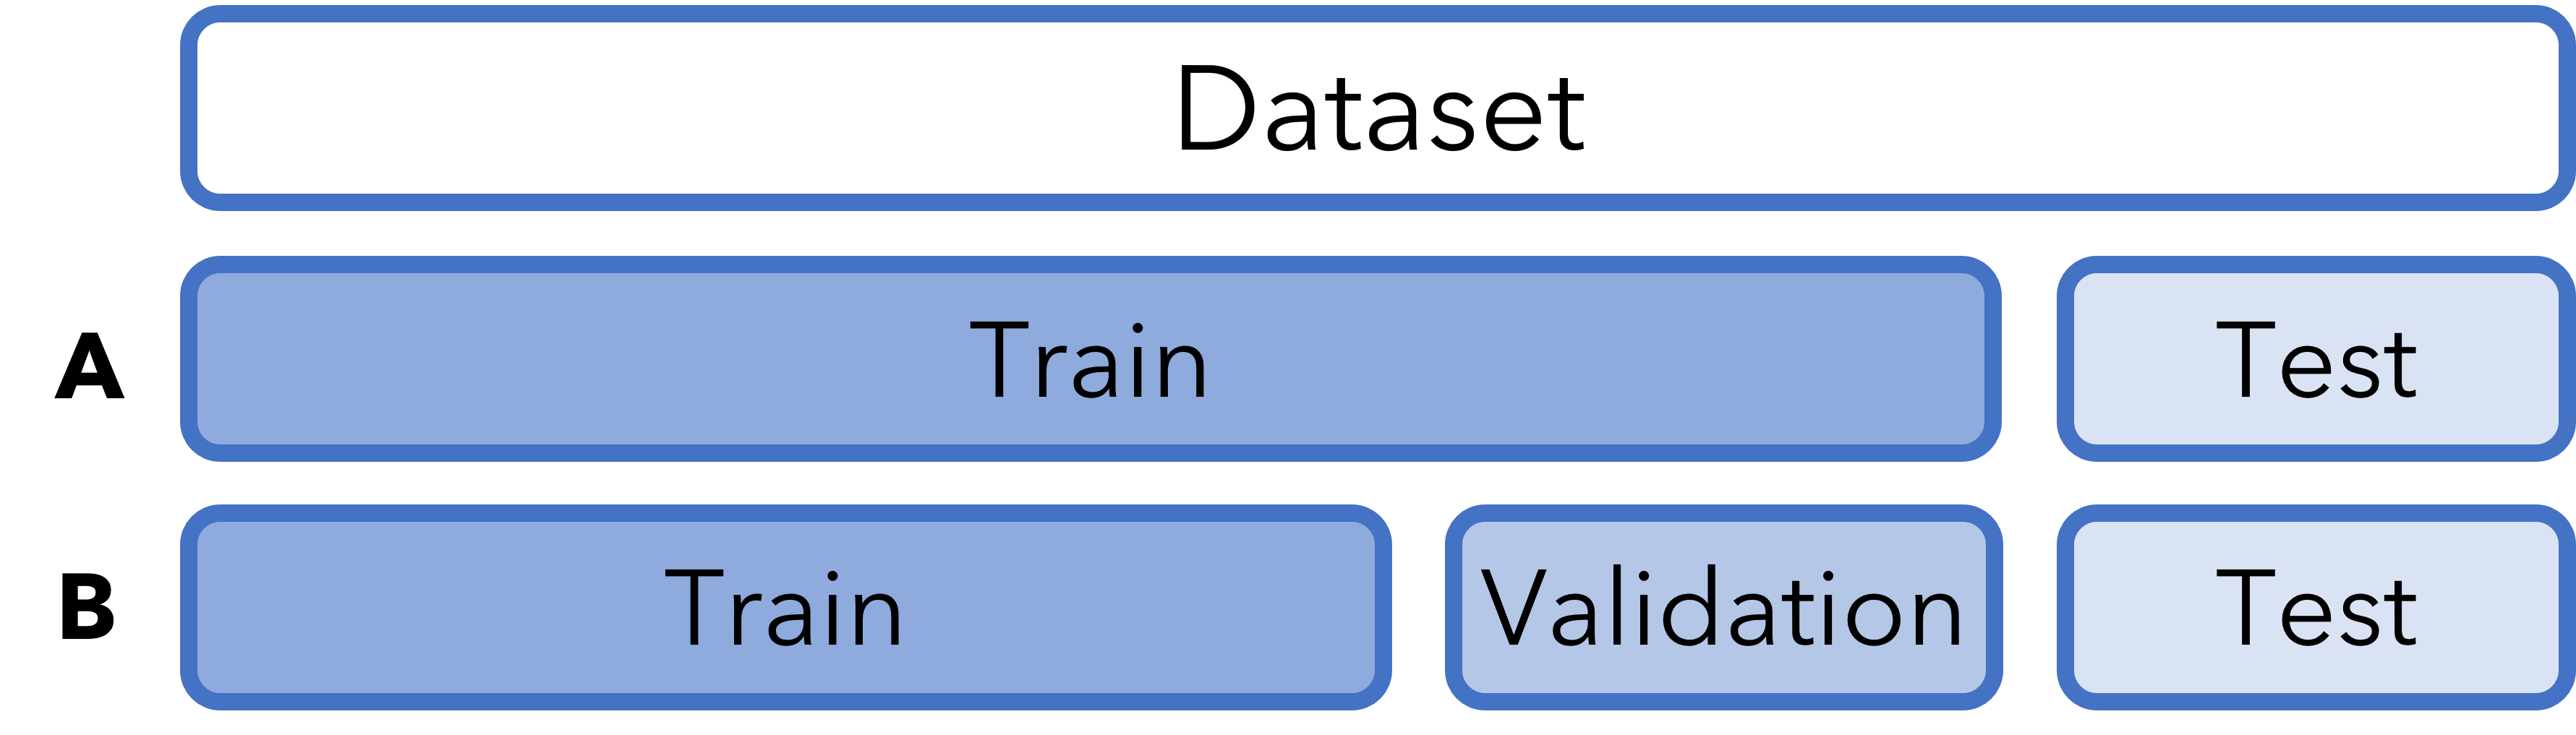
</div>

### All aboard!

There are several methods to split a dataset. Depending on the use case and the characteristics of the dataset, the data scientist (aka you!) must decide which ensure the most reliable results.

### 2.1. Train-Test

In [ ]:
from sklearn.model_selection import train_test_split

Firstly, we need to define which are the variables used for training and the one that contains the target.

In [ ]:
X_data = df_titanic.drop(["Survived", "Name", "Ticket", "Cabin"], axis=1)
X_data.head()

In [ ]:
y_data = df_titanic["Survived"]
y_data.head()

The [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) method from Scikit-learn package divides the dataset into train and test.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, shuffle=False)
X_train.index

In [ ]:
X_test.index

### 2.2. Exercice

__Exercice 11__: Select the X and y and divide the Breast Cancer dataset into training and testing set using a random percentage of 70/30 for train and test, respectivetly. 

## 3. Encoding

Raw dataset come with diverse types of variables. As models often require numeric values, there is a need to ensure all features become understandable.

There are several methods to encode variables.

### 3.1. One Hot Encoding

This method encodes variables with multiple categorical values into separate columns.

<div>
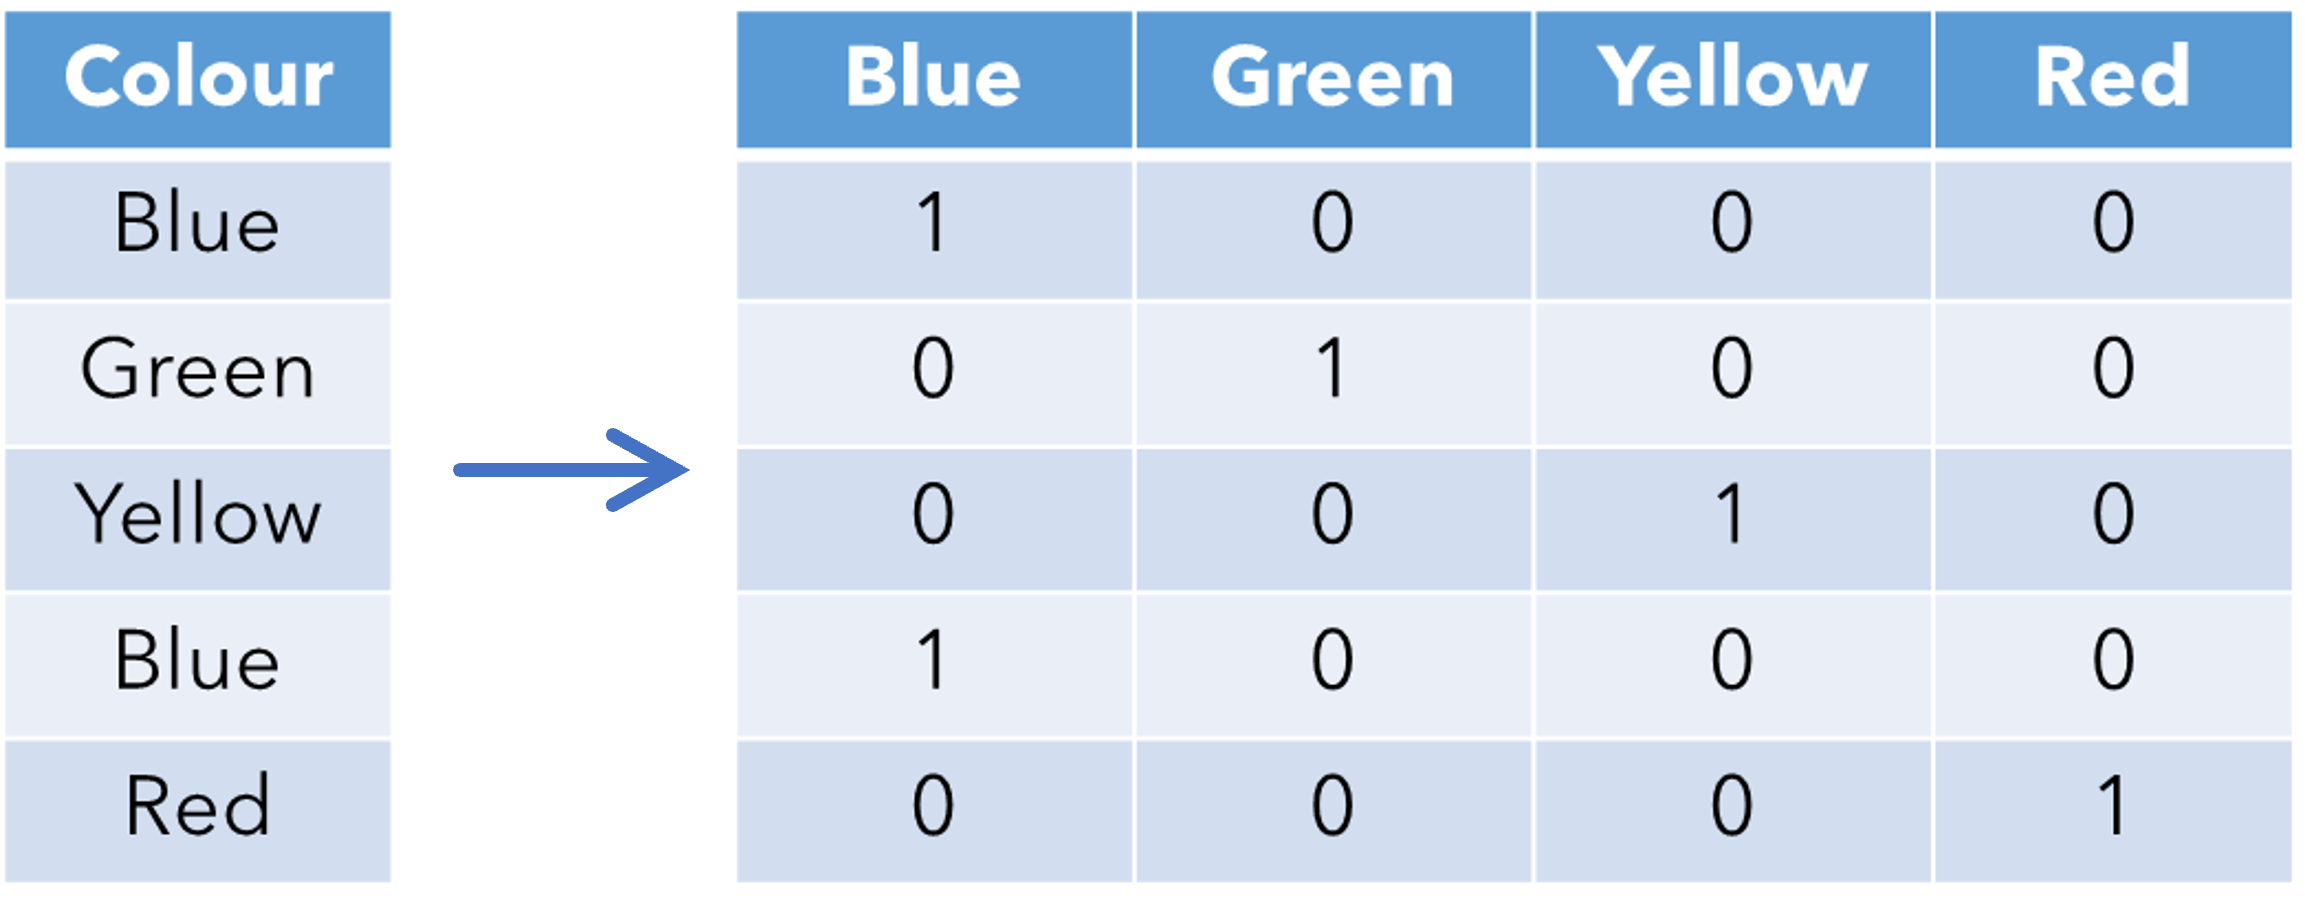
</div>

In the Titanic dataset, the variable Embarked contain categorical values, which we will convert to three new columns.

In [ ]:
import category_encoders as ce

In [ ]:
one_hot = ce.OneHotEncoder(cols=["Embarked"], use_cat_names=True, handle_unknown='return_nan',
                         handle_missing='return_nan', return_df=True, drop_invariant=True)
one_hot.fit(X_train)
X_train = one_hot.transform(X_train)

In [ ]:
X_train.head()

Now, we need to apply the same process to the test set.

In [ ]:
X_test = one_hot.transform(X_test)

### 3.2. Label or Ordinal Encoding

<div>
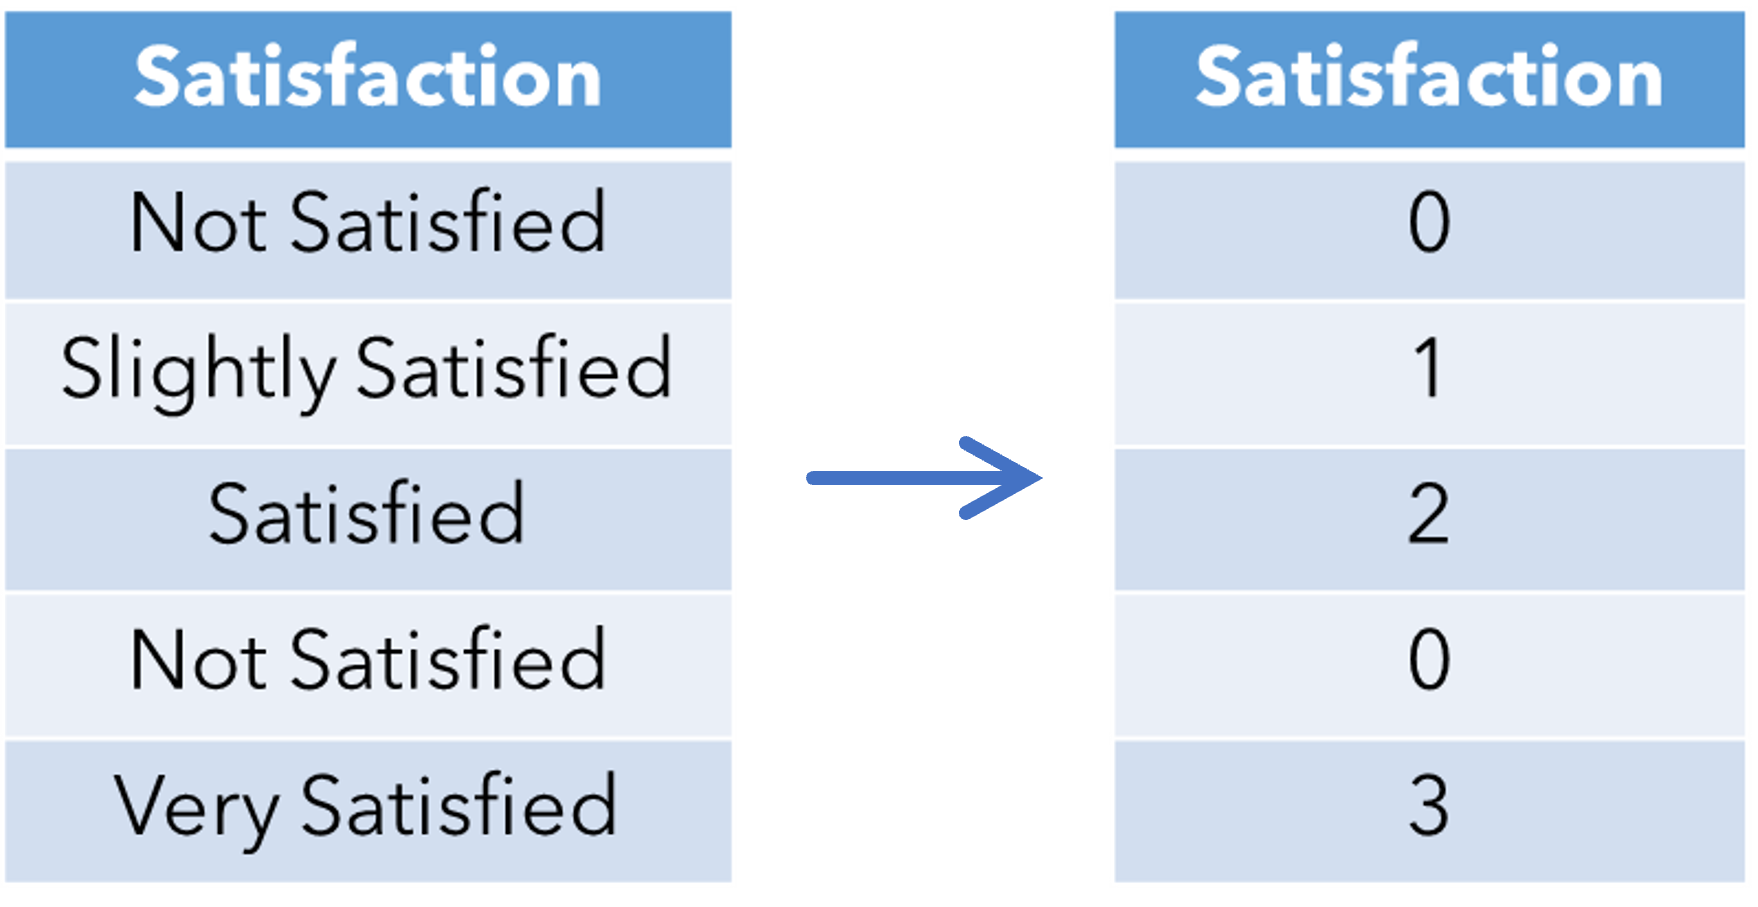
</div>

These methods encode variables with dependant categorical values into numeric values. In the Titanic dataset, Sex needs to be converted.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
X_train["Sex"] = encoder.fit_transform(X_train["Sex"])

X_train.head()

In [ ]:
X_test["Sex"] = encoder.transform(X_test["Sex"])

X_train.head()

### 3.3. Exercice

__Exercice 12__: Encode the target variable of the Breast Cancer Dataset.

## 4. Scaling

In some models, specifically those which resort to distances or similarities during the training process, it is necessary to scale variables into the a similar range. 

### 4.1. Min-Max Scaling

In this method, all features are normalized by its minimum and maximum, taking values in the range of 0 to 1.

$$X_{min-max} = {X - X_{min} \over X_{max} - X_{min}}$$

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) 
X_train[:5]

In [ ]:
X_test = scaler.transform(X_test)

### 4.2. Standard Scaling

On the other hand, the standard scaling method transforms the data 
$$X_{standard} = {X - \mu \over \sigma}$$

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_train[:5]

In [ ]:
X_test = scaler.transform(X_test)

### 4.3. Exercice

__Exercice 13__: Altough the Breast Cancer dataset is already normalized between 1 and 10, apply min max scaling to the data.